# Notebook used to merge points and GT labels for birch2 and S1 datasets

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from typing import Tuple, List, Dict, Optional, Union
from scip

### Function used to read the GT labels (.pa files)

In [9]:
def read_gt_labels(path: Path) -> np.ndarray:
    res = []
    start = False
    with open(path, 'r') as fp:
        for line in fp:
            if line.startswith('-'):
                start = True
                continue
            if start:
                assert line.strip().isnumeric(), line
                res.append(int(line.strip()))
                
    return np.array(res)

# birch2

In [22]:
basepath = Path('birch2')
data_point_path = basepath / 'birch2.txt'
label_path = basepath / 'b2-gt.pa'

points_df = pd.read_csv(data_point_path, delim_whitespace=True, header=None)
labels = read_gt_labels(label_path)

assert points_df.shape[0] == labels.size

<AxesSubplot:xlabel='0', ylabel='1'>

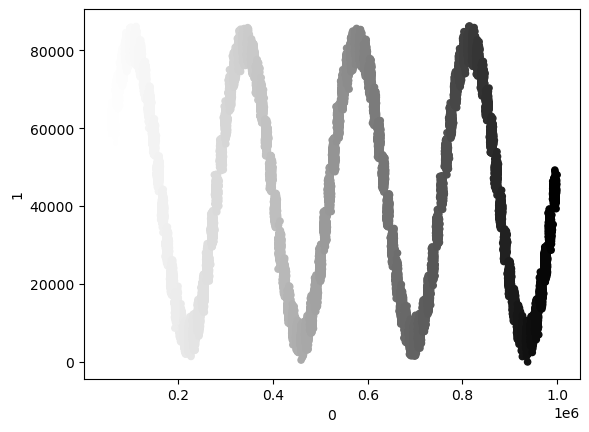

In [27]:
points_df.plot.scatter(0, 1, c=labels)

In [28]:
birch2_df = points_df.copy()
birch2_df['label'] = labels

birch2_df

,0,1,label
0,58882,63168,2
1,58959,63322,2
2,59034,60585,2
3,59145,61717,2
4,59164,59757,2
...,...,...,...
99995,195005,13817,16
99996,195015,15007,16
99997,195022,12918,16
99998,195026,13205,16


In [31]:
birch2_savepath = basepath.parent / 'birch2.csv'

birch2_df.to_csv(birch2_savepath, index=False, sep=',', header=True)

# s1

In [32]:
basepath = Path('s1')
data_point_path = basepath / 's1.txt'
label_path = basepath / 's1-label.pa'

points_df = pd.read_csv(data_point_path, header=None, delim_whitespace=True)
labels = read_gt_labels(label_path)

assert points_df.shape[0] == labels.size

<AxesSubplot:xlabel='0', ylabel='1'>

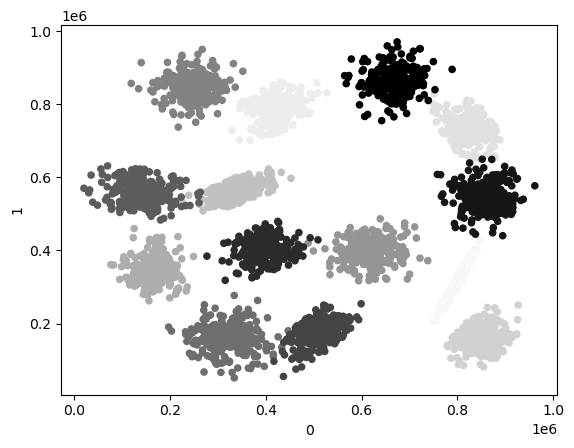

In [33]:
points_df.plot.scatter(0, 1, c=labels)

In [34]:
s1_df = points_df.copy()
s1_df['label'] = labels

s1_df

,0,1,label
0,664159,550946,1
1,665845,557965,1
2,597173,575538,1
3,618600,551446,1
4,635690,608046,1
...,...,...,...
4995,665426,853940,15
4996,691827,863963,15
4997,650661,861267,15
4998,599647,858702,15


In [35]:
s1_savepath = basepath.parent / 's1.csv'
s1_df.to_csv(s1_savepath, header=True, sep=',', index=False)

# statistics on each dataset

In [33]:
def read_dataset(fullpath: Path) -> Tuple[pd.DataFrame, np.ndarray]:
    if fullpath.suffix == '.csv':
        df = pd.read_csv(fullpath, sep=',')
        X, y = df[['0', '1']], df['label'].to_numpy()
    elif fullpath.suffix == '.arff':
        X, y = read_arff(fullpath)
    elif fullpath.suffix == '.txt':
        df = pd.read_csv(fullpath, delim_whitespace=True, header=None)
        X, y = df[[0, 1]], df[2].to_numpy()
    else:
        raise ValueError(f'invalid path {fullpath}')
    return X, y

def read_arff(fullpath: Union[str, Path]) -> Tuple[np.ndarray, np.ndarray]:
    data, meta = loadarff(fullpath)
    df = pd.DataFrame(data)

    klass = None
    if 'class' in df.columns:
        klass = 'class'
    elif 'CLASS' in df.columns:
        klass = 'CLASS'
    elif 'Class' in df.columns:
        klass = 'Class'
    assert klass in df.columns and not klass is None
    df[klass] = pd.factorize(df[klass])[0]
    
#     cols = ['x', 'y'] if {'x', 'y'}.issubset((df.columns)) else ['a0', 'a1']
    cols = [x for x in df.columns if x != klass]
    X = df[cols].values
    y = df[klass].values
    return X, y

In [34]:
dataset_path = Path()

In [35]:
for p in dataset_path.iterdir():
    if not p.is_file() or p.suffix == '.ipynb':
        continue

    X, y = read_dataset(p)
    print(f'{p.stem} - {X.shape}')

birch2 - (100000, 2)
jain - (373, 2)
zelnik5_fourlines - (512, 2)
flame - (240, 2)
spiral - (312, 2)
compound - (399, 2)
R15 - (600, 2)
twenty - (1000, 2)
zelnik1_threecircles - (299, 2)
aggregation - (788, 2)
s1 - (5000, 2)
